In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble

import toolsets.data_prep as data_prep
from sklearn.ensemble import RandomForestClassifier
import cleanlab
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_validate
from cleanlab.filter import find_label_issues
%load_ext autoreload
%autoreload 2

i am updated!


ModuleNotFoundError: No module named 'cleanlab'

# initialize the dataset

In [521]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", low_memory=False)
descriptors = descriptors.select_dtypes(exclude=['object'])
combined_data = pd.read_csv("data/multiRT/Combined dataset.csv")
hilic = combined_data.loc[combined_data['Column']=='HILIC']
hilic.reset_index(inplace=True, drop=True)
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

i am updated!


# binning the retention time

In [ ]:
# feel free to change the parameter min_diff, as it indicate the minimum difference between each bins

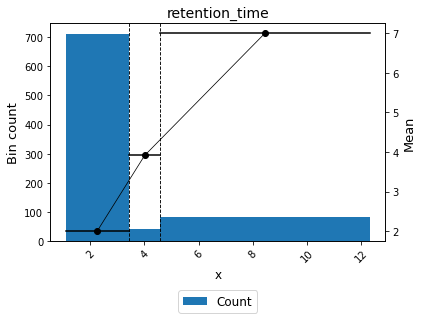

the distinct rt intervals are ['(-inf, 3.44)' '[3.44, 4.58)' '[4.58, inf)']


In [522]:
data_bin = data_prep.bin_retention_time(data,'retention_time',variable = 'retention_time', bin_method = "cart", min_diff = 1)


# identify the mislabeled data in both train and test set

In [455]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [459]:
clf = RandomForestClassifier()
# clf = lgb.LGBMClassifier()

#Create a svm Classifier
# clf = svm.SVC(kernel='rbf') # rbf Kernel


In [387]:
import lightgbm as lgb

In [523]:
data_confirmed, data_suspicious = data_prep.mislabeled_handling(data_bin, clf)

retention_time_cat


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Cleanlab found 39 potential label errors.


In [525]:
data_suspicious

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,retention_time_cat,ABC,ABCGG,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,12.321429,2,14.008885,10.537147,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
95,Ametryn,HILIC,Acetonitrile,3.0,Formic acid,CCN=c1[nH]c(=NC(C)C)[nH]c(n1)SC,3.150000,0,10.825381,9.978853,...,9.203416,46.030481,227.120467,7.097515,384,18,68.0,74.0,6.194444,3.583333
105,Atraton,HILIC,Acetonitrile,2.7,Formic acid,CCN=c1[nH]c(=NC(C)C)[nH]c(n1)OC,5.694286,2,10.825381,9.978853,...,9.203416,46.030481,211.143310,6.598228,384,18,68.0,74.0,6.194444,3.583333
106,Atraton,HILIC,Acetonitrile,3.0,Acetic acid,CCN=c1[nH]c(=NC(C)C)[nH]c(n1)OC,5.180000,2,10.825381,9.978853,...,9.203416,46.030481,211.143310,6.598228,384,18,68.0,74.0,6.194444,3.583333
107,Atraton,HILIC,Acetonitrile,3.0,Formic acid,CCN=c1[nH]c(=NC(C)C)[nH]c(n1)OC,4.318571,1,10.825381,9.978853,...,9.203416,46.030481,211.143310,6.598228,384,18,68.0,74.0,6.194444,3.583333
143,Bicalutamide,HILIC,Acetonitrile,3.0,Formic acid,C[C@](CS(=O)(=O)c1ccc(cc1)F)(C(=Nc1ccc(C#N)c(c...,8.115714,2,22.319145,18.909716,...,10.382234,64.764316,430.061041,10.001420,2378,47,152.0,175.0,13.354167,6.111111
175,Carbazole,HILIC,Acetonitrile,2.7,Formic acid,c1ccc2c(c1)c1ccccc1[nH]2,7.070000,2,10.485281,8.835388,...,9.601774,59.273430,167.073499,7.594250,219,19,72.0,87.0,2.694444,2.833333
261,Creatinine,HILIC,Methanol,3.0,Formic acid,CN1CC(=NC1=N)O,3.357143,0,5.944584,6.068455,...,8.593599,50.007331,113.058912,7.537261,59,7,38.0,42.0,3.833333,1.777778
262,Creatinine,HILIC,Methanol,5.0,Acetic acid,CN1CC(=NC1=N)O,2.615714,0,5.944584,6.068455,...,8.593599,50.007331,113.058912,7.537261,59,7,38.0,42.0,3.833333,1.777778
301,Estrone,HILIC,Acetonitrile,2.7,Formic acid,C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CCC2=O)O,3.507500,1,16.356175,12.977056,...,10.364608,69.208114,270.161980,6.432428,724,39,118.0,148.0,6.090278,4.152778


In [526]:
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

In [529]:
data_confirmed.head()

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,ABC,ABCGG,nAcid,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.930000,14.008885,10.537147,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333


In [528]:
data.shape

(836, 1333)

In [530]:
data.to_csv("data/MultiRT/hilic_data_raw.csv", index = False)

In [531]:
data_confirmed.to_csv("data/MultiRT/hilic_data_confirmed.csv", index = False)

In [540]:
data_confirmed

,Compound_name,Column,Organic_modifier,pH,Buffer,SMILES,retention_time,ABC,ABCGG,nAcid,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,split_index
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.822857,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
2,1-hydroxypyrene,HILIC,Acetonitrile,3.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.857143,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,2
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.850000,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
4,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.851429,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,2
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,c1cc2ccc3ccc(c4ccc(c1)c2c34)O,1.930000,14.008885,10.537147,0,...,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Valsartan,HILIC,Acetonitrile,5.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,3.177143,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1
832,Valsartan,HILIC,Methanol,2.7,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.808571,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,2
833,Valsartan,HILIC,Methanol,3.0,Formic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.790000,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1
834,Valsartan,HILIC,Methanol,5.0,Acetic acid,CCCCC(=O)N(Cc1ccc(cc1)c1ccccc1c1n[nH]nn1)[C@@H...,1.433333,24.305499,20.006308,3,...,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778,1


In [532]:
train, test = data_prep.make_train_test(data_confirmed)

i am updated!


In [539]:
train

,Compound_name,Column,Organic_modifier,pH,Buffer,retention_time,ABC,ABCGG,nAcid,nBase,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1-hydroxypyrene,HILIC,Acetonitrile,2.7,Formic acid,1.822857,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
3,1-hydroxypyrene,HILIC,Acetonitrile,5.0,Acetic acid,1.850000,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
5,1-hydroxypyrene,HILIC,Acetonitrile,6.7,Formic acid,1.930000,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
6,1-hydroxypyrene,HILIC,Methanol,2.7,Formic acid,1.794286,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
7,1-hydroxypyrene,HILIC,Methanol,3.0,Acetic acid,1.545714,14.008885,10.537147,0,0,...,10.190582,51.083298,218.073165,8.076784,428,33,100.0,125.0,4.027778,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Valsartan,HILIC,Acetonitrile,2.7,Formic acid,1.898571,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
830,Valsartan,HILIC,Acetonitrile,5.0,Acetic acid,2.718333,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
831,Valsartan,HILIC,Acetonitrile,5.0,Formic acid,3.177143,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778
833,Valsartan,HILIC,Methanol,3.0,Formic acid,1.790000,24.305499,20.006308,3,0,...,10.252700,80.792385,435.227040,7.134870,3122,49,160.0,186.0,11.111111,7.277778


In [544]:
x_train, y_train = data_prep.make_x_y(train)

In [545]:
len(train)

638

In [546]:
len(y_train)

638

In [547]:
y_train

0      1.822857
3      1.850000
5      1.930000
6      1.794286
7      1.545714
         ...   
828    1.898571
830    2.718333
831    3.177143
833    1.790000
834    1.433333
Name: retention_time, Length: 638, dtype: float64

# reproduce results from cleanlab website, now deprecated, only for debug usage

In [113]:
# from sklearn.datasets import fetch_openml
#
# data = fetch_openml("credit-g")  # get the credit data from OpenML
# X_raw = data.data  # features (pandas DataFrame)
# y_raw = data.target  # labels (pandas Series)
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
#
# cat_features = X_raw.select_dtypes("category").columns
# X_encoded = pd.get_dummies(X_raw, columns=cat_features, drop_first=True)
#
# num_features = X_raw.select_dtypes("float64").columns
# scaler = StandardScaler()
# X_scaled = X_encoded.copy()
# X_scaled[num_features] = scaler.fit_transform(X_encoded[num_features])
#
# y_encode = y_raw.map({"bad": 0, "good": 1})  # encode labels as integers
#
# clf = RandomForestClassifier()
# num_crossval_folds = 3  # for efficiency; values like 5 or 10 will generally work better
# pred_probs = cross_val_predict(
#     clf,
#     X_scaled,
#     y,
#     cv=num_crossval_folds,
#     method="predict_proba",
# )
# ranked_label_issues = find_label_issues(
#     labels=y, pred_probs=pred_probs, return_indices_ranked_by="self_confidence"
# )
# ranked_label_issues
#
# print(f"Cleanlab found {len(ranked_label_issues)} potential label errors.")